In [13]:
# Import packages
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import sklearn.feature_selection as sk_f
import sklearn.metrics as sk_m
import sklearn.preprocessing as sk_pre
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Columns names
COLUMNS = ["sepal length", "sepal width", "petal length", "petal width", "class"]

# Read data file
print "Reading Data File."
iris_data = pd.read_csv("iris.dat", header=None, names=COLUMNS)

# Split the data into features (X) and label values (y)
X = iris_data[COLUMNS[:-1]]
y = iris_data[COLUMNS[-1]]

Reading Data File.


In [14]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


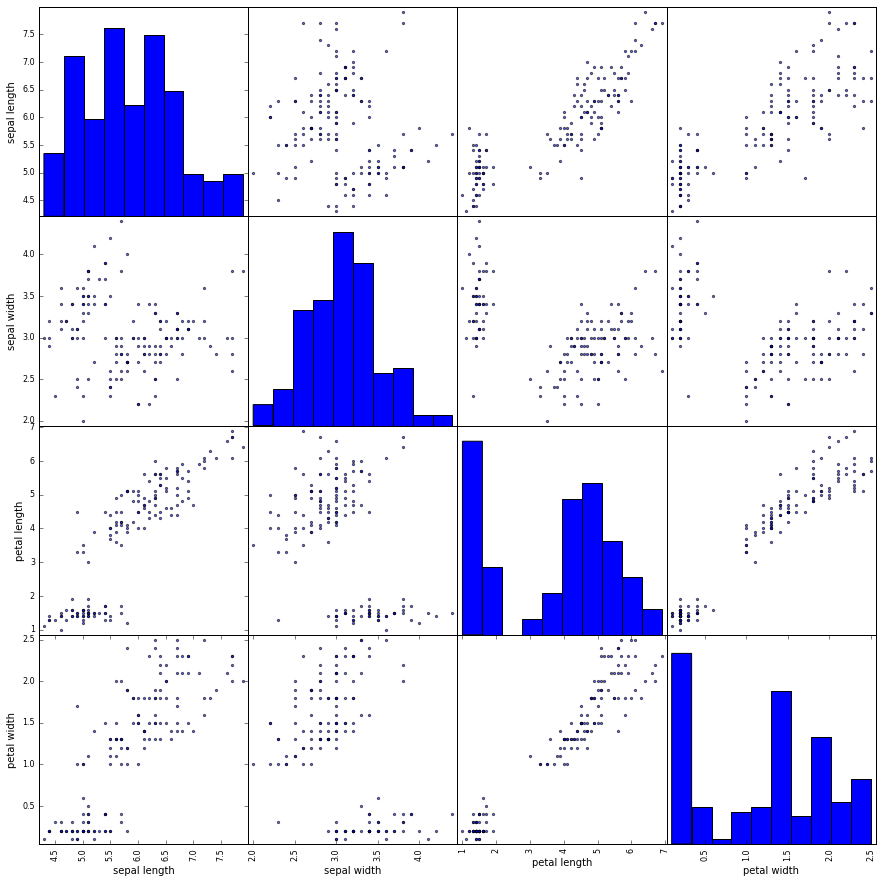

In [16]:
scatter_matrix(X, alpha=0.6, figsize=(15, 15))
plt.show()

In [17]:
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [18]:
# Linear Correlation matrix
X.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.871754,-0.428440,1.000000,0.962865
petal width,0.817941,-0.366126,0.962865,1.000000


In [19]:
# Correlation Matrix using Mutual Information
pd.DataFrame(np.array([[sk_m.mutual_info_score(None, None, contingency=np.histogram2d(X[COLUMNS[x_1]], X[COLUMNS[x_2]], bins=20)[0]) for x_1 in range(len(COLUMNS[:-1]))] for x_2 in range(len(COLUMNS[:-1]))]), index=COLUMNS[:-1], columns=COLUMNS[:-1])

,sepal length,sepal width,petal length,petal width
sepal length,2.801474,0.972856,1.207581,1.116152
sepal width,0.972856,2.610639,0.837961,0.919563
petal length,1.207581,0.837961,2.540037,1.362068
petal width,1.116152,0.919563,1.362068,2.541189


In [20]:
# Correlation between features and classes
pd.Series(sk_f.mutual_info_classif(X, y), index=COLUMNS[:-1])

sepal length    0.484849
sepal width     0.287327
petal length    0.984089
petal width     0.982291
dtype: float64

In [47]:
# Label Encoder
le = sk_pre.LabelEncoder()
le.fit(y)
y_tr = le.transform(y)

# Scaling features
std_scaler = sk_pre.StandardScaler()
X_tr = std_scaler.fit_transform(X)

# Training Model
clf=SGDClassifier(random_state=42).fit(X_tr, y_tr)

# Cross-Validation
y_pred=cross_val_predict(clf, X_tr, y, cv=10)

# Confusion Matrix
conf_mx=sk_m.confusion_matrix(y, y_pred)
print conf_mx

[[48  2  0]
 [ 2 40  8]
 [ 0  4 46]]


In [62]:
# Errors
norm_conf_mx = conf_mx / conf_mx.sum(axis=1, keepdims=True).astype(float)
np.fill_diagonal(norm_conf_mx, 0)
print norm_conf_mx

[[ 0.    0.04  0.  ]
 [ 0.04  0.    0.16]
 [ 0.    0.08  0.  ]]
